In [1]:
from utils.data_load import data_load
import utils.preprocess as prep
import utils.libraries_import
from utils.clearing import clear_data
from utils.encoders import CategoricalEncoding

In [2]:
df = data_load()

In [3]:
df = prep.process_dataframe(df)

In [4]:
df = clear_data(df)

In [5]:
epic_df = df[df['supplier_okpo']=='32490244']

In [6]:
ce = CategoricalEncoding(epic_df)

In [7]:
epic_df['tender_buy_type']=epic_df['tender_buy_type'].fillna('Не вказано')
epic_df = ce.one_hot('tender_buy_type')
ce.update_data(epic_df)
epic_df = ce.one_hot('tender_procedure')
ce.update_data(epic_df)
epic_df = ce.label_encoding('tender_procedure')
ce.update_data(epic_df)

C:\Users\Misha\AppData\Local\Temp\ipykernel_6380\545563965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epic_df['tender_buy_type']=epic_df['tender_buy_type'].fillna('Не вказано')


In [8]:
epic_df

,tender_procedure,lot_amount,tender_VAT,lot_quantity,lot_measure,payment_info,type_payment,guarantee,cpv_code,category,tender_buy_type,date_publish,date_start_accept,date_end_accept,date_auction,date_supply_to,organizer_okpo,organizer_region,organizer_city,supplier_okpo,price_offer_before_auction,winner,days_to_get_paid,prepayment,postpayment,prepayment_percentage,postpayment_percentage,amount_of_splits,tender_buy_type_Не вказано,tender_buy_type_Послуги,tender_buy_type_Товари,tender_procedure_Відкриті торги,tender_procedure_Відкриті торги з особливостями,tender_procedure_Відкриті торги з публікацією англійською мовою,tender_procedure_Запит (ціни) пропозицій,tender_procedure_Спрощена закупівля
788,4,3000000.0,1,5800.0,м³,90 Календарних днів\r,Пiсляоплата 100.0%\r,NaN,14210000-6,"Гравій, пісок, щебінь і наповнювачі",Не вказано,2021-01-04 10:18:53.000,2021-01-12 11:00:00.000,2021-01-15 11:00:00,2021-01-18 13:46:59,2021-12-31 00:00:00.000,03349022,Львівська область,Львів,32490244,0.0,0,90,0.0,1.0,0.0,100.0,1,1,0,0,0,0,0,0,1
794,4,3000000.0,1,5800.0,м³,90 Календарних днів\r,Пiсляоплата 100.0%\r,NaN,14210000-6,"Гравій, пісок, щебінь і наповнювачі",Не вказано,2021-01-04 10:18:53.000,2021-01-12 11:00:00.000,2021-01-15 11:00:00,2021-01-18 13:46:59,2021-12-31 00:00:00.000,03349022,Львівська область,Львів,32490244,2994774.0,0,90,0.0,1.0,0.0,100.0,1,1,0,0,0,0,0,0,1
3250,4,98690.0,0,1950.0,шт,30 Календарних днів\r,Пiсляоплата 100.0%\r,NaN,44110000-4,Конструкційні матеріали,Товари,2021-01-04 15:52:02.000,2021-01-12 00:00:00.000,2021-01-15 00:00:00,2021-01-15 11:45:53,2021-05-01 00:00:00.000,14310052,Харківська область,Харків,32490244,0.0,0,30,0.0,1.0,0.0,100.0,1,0,0,1,0,0,0,0,1
3255,4,98690.0,0,1950.0,шт,30 Календарних днів\r,Пiсляоплата 100.0%\r,NaN,44110000-4,Конструкційні матеріали,Товари,2021-01-04 15:52:02.000,2021-01-12 00:00:00.000,2021-01-15 00:00:00,2021-01-15 11:45:53,2021-05-01 00:00:00.000,14310052,Харківська область,Харків,32490244,72000.0,1,30,0.0,1.0,0.0,100.0,1,0,0,1,0,0,0,0,1
3334,0,146000.0,1,1.0,лот,30 Календарних днів\r,Пiсляоплата 100.0%\r,NaN,44110000-4,Конструкційні матеріали,Не вказано,2021-01-04 15:52:30.000,2021-01-04 15:52:30.000,2021-01-20 15:56:49,2021-01-21 12:44:27,2021-12-31 15:56:49.000,03327121,Запорізька область,ЗАПОРІЖЖЯ,32490244,104640.0,0,30,0.0,1.0,0.0,100.0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590287,3,2248.0,1,2.0,шт,NaN,-,NaN,39710000-2,Електричні побутові прилади,Товари,2024-01-17 15:57:07.900,2024-01-17 15:57:07.900,2024-01-22 10:00:00,NaT,2024-07-31 15:49:13.000,03357168,Черкаська область,Черкаси,32490244,0.0,1,NaN,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0
2590464,3,1800.0,1,3.6,м²,NaN,-,NaN,44110000-4,Конструкційні матеріали,Товари,2024-01-17 21:19:28.410,2024-01-17 21:19:28.410,2024-01-20 23:00:00,NaT,2024-12-31 00:00:00.000,02071100,Полтавська область,Полтава,32490244,0.0,1,NaN,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0
2590465,3,1800.0,1,3.6,м²,NaN,-,NaN,44110000-4,Конструкційні матеріали,Товари,2024-01-17 21:19:28.410,2024-01-17 21:19:28.410,2024-01-20 23:00:00,NaT,2024-12-31 00:00:00.000,02071100,Полтавська область,Полтава,32490244,0.0,0,NaN,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0
2590475,3,3500.0,1,250.0,кг,NaN,-,NaN,44110000-4,Конструкційні матеріали,Товари,2024-01-17 21:55:50.047,2024-01-17 21:55:50.047,2024-01-20 23:00:00,NaT,2024-12-31 00:00:00.000,02071100,Полтавська область,Полтава,32490244,0.0,0,NaN,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0


In [9]:
categories =[]
for i in epic_df['cpv_code']:
    categories.append(int((i)[:2]))
epic_df['category'] = categories

In [10]:
epic_df['category_participation count'] = epic_df.groupby('category').cumcount()

In [11]:
from math import isnan

In [12]:
guarantees = [False if (isnan(x) or int(x) == 0) else True for x in epic_df['guarantee']]
epic_df['guarantee'] = guarantees

In [13]:
epic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25955 entries, 788 to 2590477
Data columns (total 37 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   tender_procedure                                                 25955 non-null  int32         
 1   lot_amount                                                       25955 non-null  float64       
 2   tender_VAT                                                       25955 non-null  int64         
 3   lot_quantity                                                     25955 non-null  float64       
 4   lot_measure                                                      25955 non-null  object        
 5   payment_info                                                     20707 non-null  object        
 6   type_payment                                                     25955 non

In [14]:
epic_df = epic_df.drop(['tender_buy_type', 'cpv_code', 'tender_procedure', 'date_supply_to', 'supplier_okpo', 'lot_measure', 'payment_info', 'type_payment', 'organizer_city', 'organizer_region', 'organizer_okpo'], axis=1)

In [15]:
epic_df.days_to_get_paid = epic_df.days_to_get_paid.fillna(-1)

In [16]:
import pandas as pd

In [17]:
epic_df.days_to_get_paid = pd.to_numeric(epic_df.days_to_get_paid)

In [18]:
epic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25955 entries, 788 to 2590477
Data columns (total 26 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   lot_amount                                                       25955 non-null  float64       
 1   tender_VAT                                                       25955 non-null  int64         
 2   lot_quantity                                                     25955 non-null  float64       
 3   guarantee                                                        25955 non-null  bool          
 4   category                                                         25955 non-null  int64         
 5   date_publish                                                     25955 non-null  datetime64[ns]
 6   date_start_accept                                                25955 non

In [38]:
epic_df = epic_df[epic_df['date_publish'] > pd.to_datetime('2022-06-30')]

In [39]:
epic_df_train = epic_df[epic_df['date_publish'] < pd.to_datetime('2023-08-28')]
epic_df_test = epic_df[epic_df['date_publish'] >= pd.to_datetime('2023-08-28')]

In [40]:
y_train = epic_df_train['winner']
X_train = epic_df_train.drop(['date_start_accept', 'date_end_accept', 'date_auction', 'date_publish','winner'], axis=1)
y_test = epic_df_test['winner']
X_test = epic_df_test.drop(['date_start_accept', 'date_end_accept', 'date_auction', 'date_publish','winner'], axis=1)

In [41]:
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

def xgb_objective(params):
    clf = xgb.XGBClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        learning_rate=params['learning_rate'],
        objective='binary:logistic',
        eval_metric='logloss'
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = -roc_auc_score(y_test, y_pred)
    return {'loss': score, 'status': STATUS_OK}

# Define hyperparameter search space for XGBoost
xgb_space = {
    'n_estimators': hp.uniform('n_estimators', 10, 400),
    'max_depth': hp.uniform('max_depth', 3, 5),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.05),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}

# Define objective function for LightGBM
def lgb_objective(params):
    clf = lgb.LGBMClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        learning_rate=params['learning_rate'],
        reg_alpha=params['reg_alpha'],
        objective='binary',
        metric='binary_logloss'
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = -roc_auc_score(y_test, y_pred)
    return {'loss': score, 'status': STATUS_OK}

lgb_space = {
    'n_estimators': hp.uniform('n_estimators', 50, 500),
    'max_depth': hp.uniform('max_depth', 3, 5),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.05),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 0.5)
}

xgb_trials = Trials()
lgb_trials = Trials()

# Optimize XGBoost hyperparameters
xgb_best = fmin(fn=xgb_objective, space=xgb_space, algo=tpe.suggest, max_evals=50, trials=xgb_trials, verbose=False)

# Optimize LightGBM hyperparameters
lgb_best = fmin(fn=lgb_objective, space=lgb_space, algo=tpe.suggest, max_evals=50, trials=lgb_trials, verbose=False)

# Print the best hyperparameters for XGBoost and LightGBM
print("Best XGBoost hyperparameters:", xgb_best)
print("Best LightGBM hyperparameters:", lgb_best)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-cho

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [42]:
class Ensemble:
    def __init__(self, params):
        self.lgb_params = params['lgb_params']
        self.xgb_params = params['xgb_params']
        
        self.lgb_model = lgb.LGBMClassifier(**self.lgb_params)
        self.xgb_model = xgb.XGBClassifier(**self.xgb_params)
        
    def fit(self, X, y):
        return (self.lgb_model.fit(X, y), self.xgb_model.fit(X, y))
    
    def predict(self, X, weights=[1, 1], threshold=0.5):
        ensemble_score = (self.lgb_model.predict(X) * weights[0] + self.xgb_model.predict(X) * weights[1]) / 2
        return np.where(ensemble_score >= threshold, 1, 0)

In [43]:
xgb_best['n_estimators'] = int(xgb_best['n_estimators'])
lgb_best['n_estimators'] = int(lgb_best['n_estimators'])
xgb_best['max_depth'] = int(xgb_best['max_depth'])
lgb_best['max_depth'] = int(lgb_best['max_depth'])
xgc = xgb.XGBClassifier(n_estimators=xgb_best['n_estimators'],
        max_depth=int(xgb_best['max_depth']),
        learning_rate=0.1,
        subsample=xgb_best['subsample'],
        colsample_bytree=xgb_best['colsample_bytree'],
        objective='binary:hinge',
        eval_metric='logloss')
lbg = lgb.LGBMClassifier(n_estimators=lgb_best['n_estimators'],
        max_depth=int(lgb_best['max_depth']),
        learning_rate=0.1,
        subsample=lgb_best['subsample'],
        colsample_bytree=lgb_best['colsample_bytree'],
        reg_alpha=lgb_best['reg_alpha'],
        objective='binary',
        metric='binary_logloss')
params = {'lgb_params': lgb_best, 'xgb_params': xgb_best}
model_ens = Ensemble(params)

In [44]:
from utils.models import display_results

ROC AUC:  0.5328594501035431
F1 score:  0.16908212560386474
Accuracy:  0.790796675451044
Precision:  0.38181818181818183
Recall:  0.10858324715615306
lot_amount  :  0.058347005
tender_VAT  :  0.053437658
lot_quantity  :  0.054423526
guarantee  :  0.054621115
category  :  0.0661482
price_offer_before_auction  :  0.077423654
days_to_get_paid  :  0.05321457
prepayment  :  0.041943166
postpayment  :  0.12291327
prepayment_percentage  :  0.021231791
postpayment_percentage  :  0.055639446
amount_of_splits  :  0.050947767
tender_buy_type_Не вказано  :  0.0
tender_buy_type_Послуги  :  0.0
tender_buy_type_Товари  :  0.0
tender_procedure_Відкриті торги  :  0.081173755
tender_procedure_Відкриті торги з особливостями  :  0.06221129
tender_procedure_Відкриті торги з публікацією англійською мовою  :  0.038252767
tender_procedure_Запит (ціни) пропозицій  :  0.0
tender_procedure_Спрощена закупівля  :  0.053325284
category_participation count  :  0.054745726


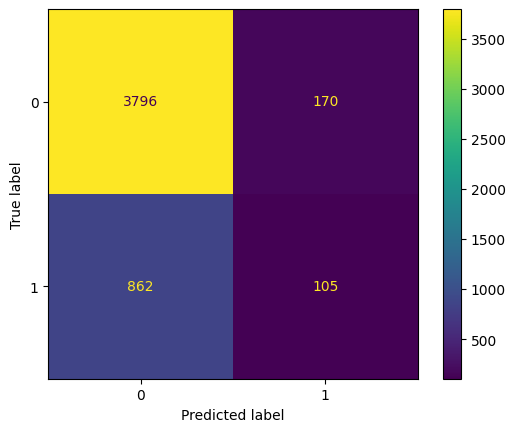

In [45]:
xgb_test = xgb.XGBClassifier()
xgb_test.fit(X_train, y_train)
preds = xgb_test.predict(X_test)
display_results(xgb_test, y_test, preds)

ROC AUC:  0.5343995575629668
F1 score:  0.1812548412083656
Accuracy:  0.7857287654571254
Precision:  0.3611111111111111
Recall:  0.12099276111685625
lot_amount  :  0.060015094
tender_VAT  :  0.046863656
lot_quantity  :  0.060517672
guarantee  :  0.053129394
category  :  0.07445091
price_offer_before_auction  :  0.094271675
days_to_get_paid  :  0.05746787
prepayment  :  0.042422075
postpayment  :  0.06952846
prepayment_percentage  :  0.048866674
postpayment_percentage  :  0.086894326
amount_of_splits  :  0.04818771
tender_buy_type_Не вказано  :  0.0
tender_buy_type_Послуги  :  0.0
tender_buy_type_Товари  :  0.0
tender_procedure_Відкриті торги  :  0.046887316
tender_procedure_Відкриті торги з особливостями  :  0.057697304
tender_procedure_Відкриті торги з публікацією англійською мовою  :  0.039096795
tender_procedure_Запит (ціни) пропозицій  :  0.0
tender_procedure_Спрощена закупівля  :  0.058134995
category_participation count  :  0.05556802


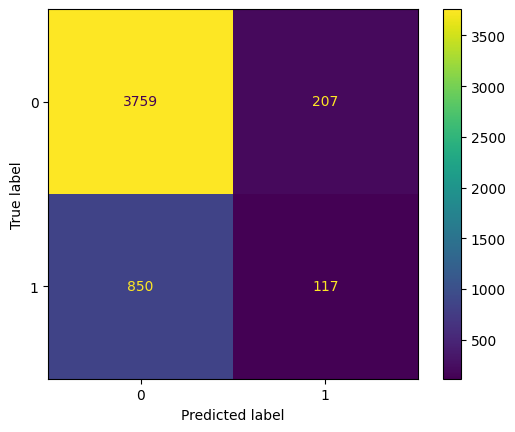

In [46]:
xgc.fit(X_train, y_train)
preds = xgc.predict(X_test)
display_results(xgc, y_test, preds)

In [47]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [48]:
lbg.fit(X_train, y_train)
preds = lbg.predict(X_test)
roc = roc_auc_score(y_test, preds)
prec = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
print('ROC AUC: ', roc)
print('F1 score: ', f1)
print('Accuracy: ', accuracy)
print('Precision: ', prec)
print('Recall: ', recall)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1456, number of negative: 6115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 7571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192313 -> initscore=-1.435052
[LightGBM] [Info] Start training from score -1.435052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

ROC AUC:  0.5329982983592177
F1 score:  0.17014446227929375
Accuracy:  0.7903912426515305
Precision:  0.37992831541218636
Recall:  0.10961737331954498
